# ::::: C O D E :::::

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


### Parameters

In [2]:
# Parameters
p = 5e-6  # pixel pitch (in meters)
lambda_= 500e-9  # wavelength (in meters)
k = 2 * np.pi / lambda_  # wavenumber
z = 1000e-6  # propagation distance (in meters)
beta = np.pi / (2 * 255)  # scaling factor

### Loading the image and converting to grayscale

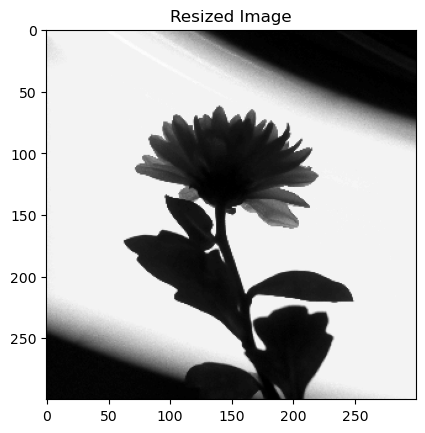

Resized pixel value:  11


In [3]:
# Loading the image and converting to grayscale
image_path = r'D:\1.Study stuff\SEM 3 @IITD\Optical Imaging\Assignment 1\Test2.jpg'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resizing the image to 300x 300 pixels
image_resized = cv2.resize(image, (300,300))
plt.imshow(image_resized, cmap='gray')
plt.title('Resized Image')
plt.show()
print('Resized pixel value: ', image_resized[100, 100])

### Scaling the image pixel values

Scaled pixel value:  0.06775984154801515


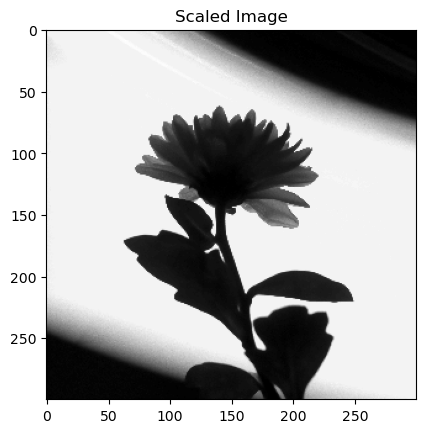

In [4]:
# Scaling the image pixel values
image_scaled = beta * image_resized
plt.imshow(image_scaled, cmap='gray')
plt.title('Scaled Image')
print('Scaled pixel value: ', image_scaled[100, 100])

In [5]:
# Getting the dimensions of the image
rows, cols = image_resized.shape

### Creating the coordinate grids

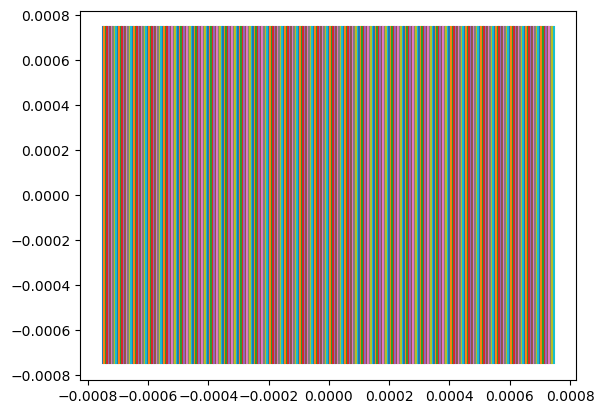

In [6]:
# Creaing the coordinate grids
x = np.linspace(-cols//2, cols//2 - 1, cols) * p
y = np.linspace(-rows//2, rows//2 - 1, rows) * p
x, y = np.meshgrid(x, y)
plt.plot(x,y)
plt.show()

### Creating the circular aperture function (circ function)

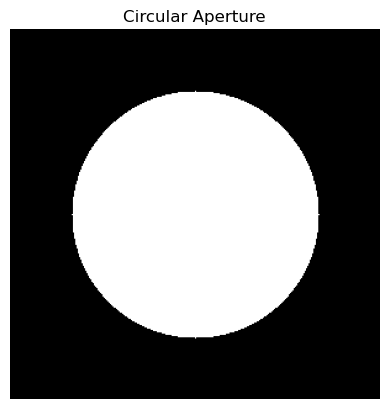

In [7]:
aperture_radius = 100  # radius in pixels
circ = (x**2 + y**2) <= (aperture_radius * p)**2
plt.imshow(circ, cmap='gray')
plt.title('Circular Aperture')
plt.axis('off')
plt.show()

In [8]:
# Creating the complex field u(x, y) = exp[iβg(x, y)] circ(x² + y²)
u = np.exp(1j * image_scaled) * circ

In [9]:
# Fourier transform of the complex field
U = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(u)))

### Creating the frequency grids 

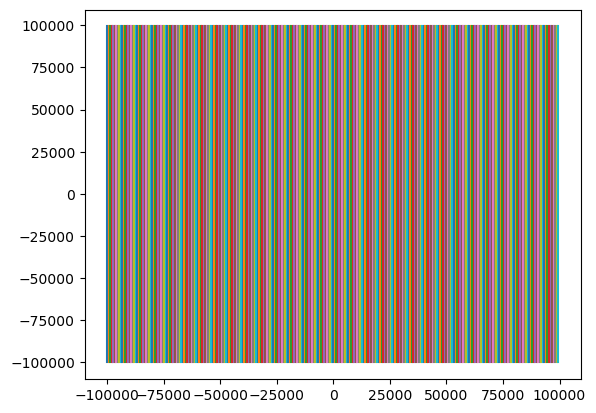

In [10]:
fx = np.fft.fftshift(np.fft.fftfreq(cols, d=p))
fy = np.fft.fftshift(np.fft.fftfreq(rows, d=p))
fx, fy = np.meshgrid(fx, fy)
plt.plot(fx,fy)
plt.show()

### Computing the propagation transfer function

In [11]:
alpha = np.sqrt(np.maximum(k**2 - (2 * np.pi * fx)**2 - (2 * np.pi * fy)**2, 0))  # Use maximum to avoid complex results
H = np.exp(1j * alpha * z)

### Low pass filter 

In [12]:
cutoff_freq = 1 / (2 * p)  # Nyquist frequency
low_pass_filter = np.sqrt(fx**2 + fy**2) < cutoff_freq
U_filtered = U * low_pass_filter

In [13]:
U1 = U_filtered * H

### Inverse Fourier transform to get the propagated field

In [14]:
u1 = np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(U1)))

### Computing the intensity of the propagated field

In [15]:
intensity = np.abs(u1)**2

### Plotting

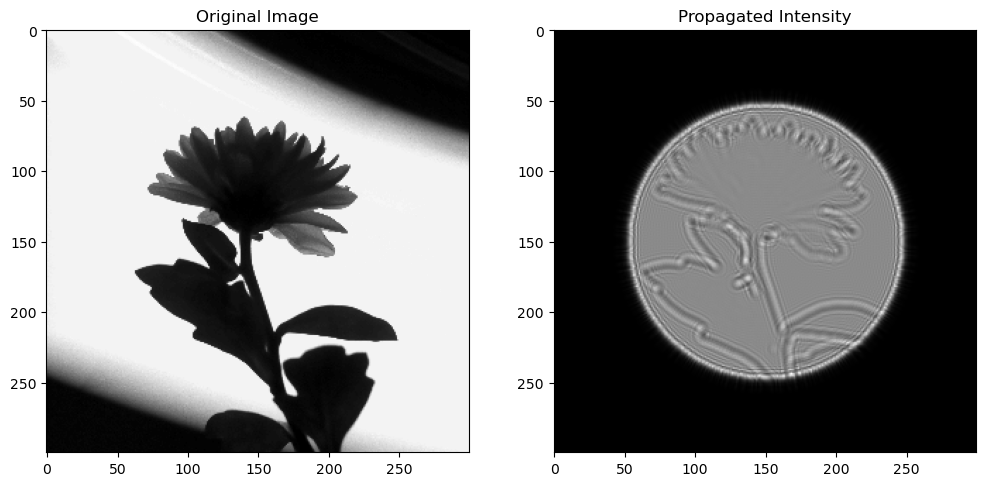

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_resized, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Propagated Intensity")
plt.imshow(intensity, cmap='gray')
plt.show()
